In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spa
import scipy.linalg as linalg
import math


In [2]:
data_file= "hw09_data_set.csv" 
dataset = np.genfromtxt(data_file, delimiter=",")   
X = dataset
N = X.shape[0]
delta = 2


In [3]:
D = spa.distance_matrix(X, X)
B = np.zeros((N, N)).astype(int)
B[D < delta] = 1
for i in range(N):
    B[i, i] = 0

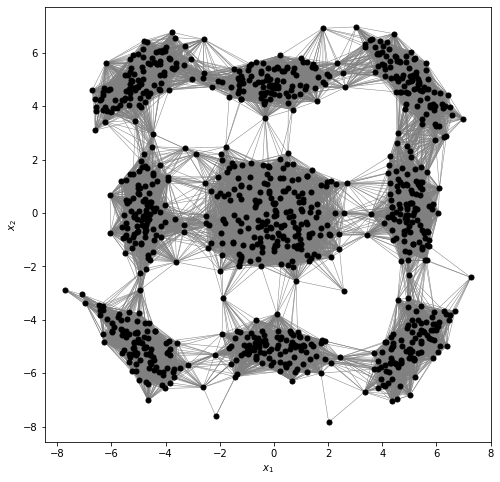

In [4]:
fig = plt.figure(figsize = (8, 8))

for i in range(N):
    for j in range(N - i):
        if B[i][j+i] == 1:
            x_vals = [X[i, 0], X[j+i, 0]]
            y_vals = [X[i, 1], X[j+i, 1]]
            plt.plot(x_vals, y_vals, "-", linewidth = 0.5, color = "grey")

plt.plot(X[:, 0], X[:, 1], ".", markersize = 10, color = "black")
plt.plot
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


In [5]:

D = np.diag(np.sum(B, axis = 0))

D_inv2 = np.sqrt(linalg.cho_solve(linalg.cho_factor(D), np.eye(N)))
L_symmetric = np.eye(N) - np.matmul(D_inv2, np.matmul(B, D_inv2))

print(L_symmetric[0:5,0:5])

[[ 1.          0.         -0.01277024 -0.01689343 -0.01277024]
 [ 0.          1.         -0.01683588  0.          0.        ]
 [-0.01277024 -0.01683588  1.          0.         -0.01190476]
 [-0.01689343  0.          0.          1.          0.        ]
 [-0.01277024  0.         -0.01190476  0.          1.        ]]


In [6]:

eigenvalues, eigenvectors = linalg.eig(L_symmetric)

R = 5
r_smallest = np.argsort(eigenvalues)[1:(R+1)]

Z = eigenvectors[:, r_smallest]
print(Z[0:5,0:5])

[[ 0.02492986 -0.03008423 -0.00946604  0.05116243  0.0229564 ]
 [ 0.01590745 -0.02367529 -0.00235798  0.037579    0.0141235 ]
 [ 0.02601003 -0.03273215 -0.00886993  0.05526008  0.02411414]
 [ 0.02147879 -0.02190107 -0.01054254  0.03633024  0.0175098 ]
 [ 0.02624211 -0.03262591 -0.00925994  0.05524827  0.02432336]]


In [7]:
K = 9

In [8]:

def update_centroids(memberships, X):
    # update centroids
    centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

In [9]:
indices = [242, 528, 570, 590, 648, 667, 774, 891,955]
centroids = Z[indices]
memberships = update_memberships(centroids, Z)

In [10]:
iteration = 1
while True:
    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break

    iteration = iteration + 1


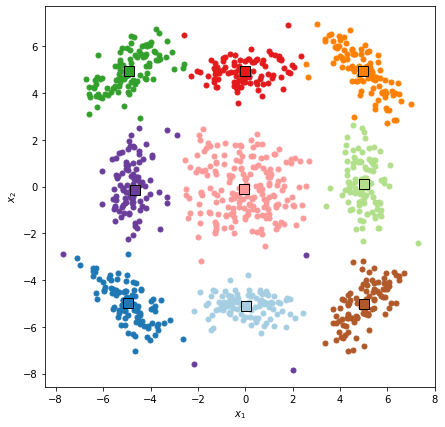

In [12]:

cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                           "#a6cee3", "#b2df8a", "#fb9a99"])
means = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])

fig = plt.figure(figsize = (7, 7))

for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10, color = cluster_colors[c])
    plt.plot(means[c, 0], means[c, 1], "s", markersize = 10, markerfacecolor = cluster_colors[c], markeredgecolor = "black")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()